In [3]:
import pandas as pd

# Load Excel file
df_sales = pd.read_excel(r'D:\ML PROJECTS\finaltics ml projects\sales-prediction-advertising-analysis\Sales Prediction Dataset\advertising_sales_data.xlsx')

# Explore the data
df_sales.head()
df_sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Campaign   200 non-null    object 
 1   TV         200 non-null    float64
 2   Radio      198 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


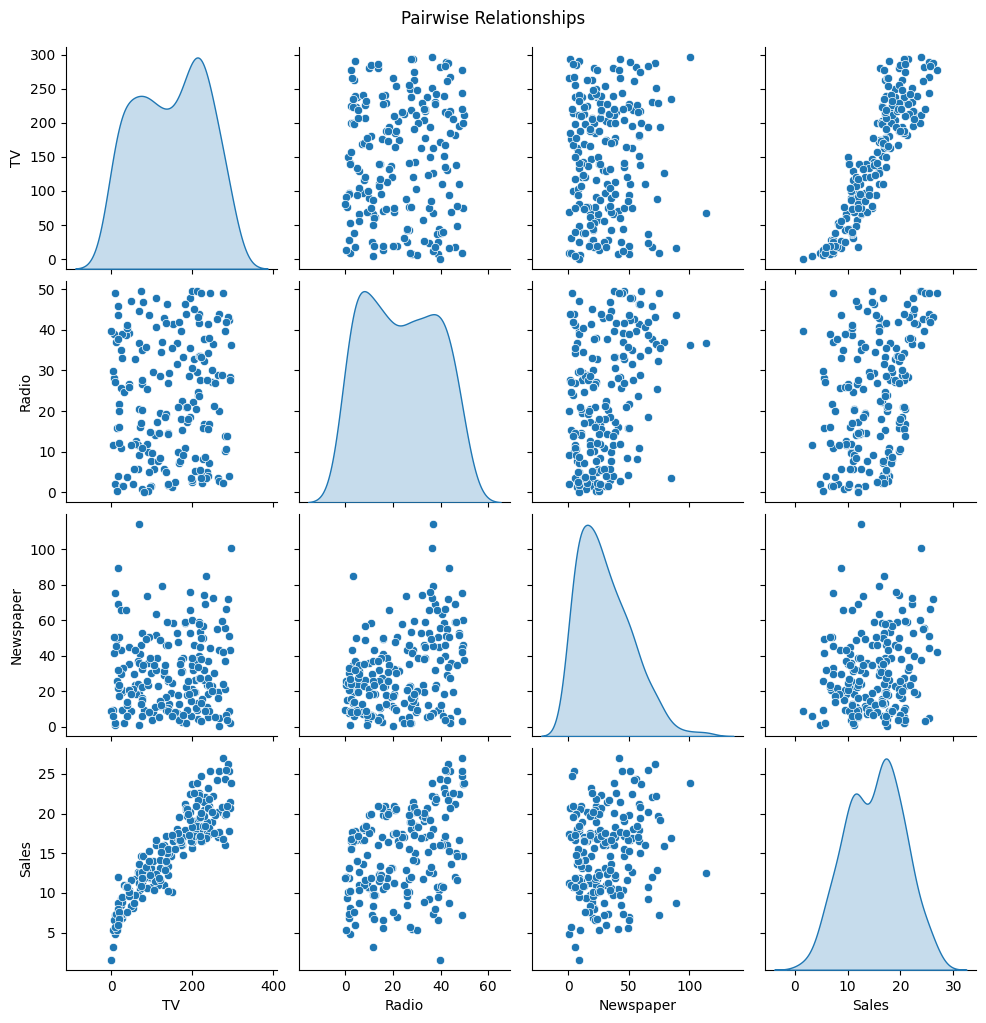

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_sales, diag_kind='kde')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


In [6]:
# Drop rows with missing values
df_sales_clean = df_sales.dropna()

# Re-define X and y
X = df_sales_clean[['TV', 'Radio', 'Newspaper']]
y = df_sales_clean['Sales']


In [8]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
import numpy as np
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

print("Coefficients:\n", pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"]))


R² Score: 0.89910282638328
RMSE: 1.420782846760538
Coefficients:
            Coefficient
TV            0.054303
Radio         0.104069
Newspaper     0.003808


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

# OPTIONAL: Handle missing values if you haven't already
df_sales = df_sales.fillna(df_sales.mean(numeric_only=True))

# Features and label
X = df_sales[['TV', 'Radio', 'Newspaper']]
y = df_sales['Sales']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Feature importances (coefficients)
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coef_df)


R² Score: 0.9059117026092904
RMSE: 1.7051193173793018
           Coefficient
TV            0.054509
Radio         0.100967
Newspaper     0.004320


In [1]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import MSO_ANCHOR, MSO_AUTO_SIZE
from pptx.dml.color import RGBColor
from pptx.enum.shapes import MSO_SHAPE
from pptx.enum.text import MSO_ANCHOR, MSO_AUTO_SIZE
from pptx.enum.dml import MSO_THEME_COLOR # Import for theme colors

def create_presentation():
    """
    Generates a PowerPoint presentation summarizing the analysis of
    Facebook Live Sellers and Sales Prediction datasets, with improved backgrounds.
    """
    prs = Presentation()

    # Define a custom title slide layout (index 0 is usually title slide)
    title_slide_layout = prs.slide_layouts[0]

    # Define a custom content slide layout (index 1 is usually title and content)
    content_slide_layout = prs.slide_layouts[1]

    # Define background colors
    # Using a light blue-gray for content slides
    content_bg_color = RGBColor(240, 248, 255) # AliceBlue
    # Using a slightly darker shade for the title slide or keeping it default
    title_bg_color = RGBColor(220, 230, 240) # Lighter blue-gray

    # --- Slide 1: Title Slide ---
    slide = prs.slides.add_slide(title_slide_layout)
    title = slide.shapes.title
    subtitle = slide.placeholders[1]

    title.text = "Data-Driven Insights: Sales & Social Media Performance"
    subtitle.text = "Uncovering Key Trends and Predictive Power\n\nYour Name/Team Name\nMay 21, 2025"

    # Set background for title slide
    background = slide.background
    fill = background.fill
    fill.solid()
    fill.fore_color.rgb = title_bg_color

    # --- Slide 2: Introduction & Project Overview ---
    slide = prs.slides.add_slide(content_slide_layout)
    title = slide.shapes.title
    body = slide.shapes.placeholders[1]

    title.text = "Project Overview"
    tf = body.text_frame
    p = tf.add_paragraph()
    p.text = "This presentation summarizes the analysis of two distinct datasets:"
    p.level = 0
    p = tf.add_paragraph()
    p.text = "Facebook Live Sellers Dataset (Thailand): Examining engagement metrics and their impact on different content types."
    p.level = 1
    p = tf.add_paragraph()
    p.text = "Sales Prediction Dataset: Predicting product sales based on advertising expenditures across various platforms."
    p.level = 1
    p = tf.add_paragraph()
    p.text = "Goal: To extract actionable insights and build predictive models to inform business strategies."
    p.level = 0

    # Set background for content slide
    background = slide.background
    fill = background.fill
    fill.solid()
    fill.fore_color.rgb = content_bg_color

    # --- Slide 3: Facebook Live Sellers - Data Overview ---
    slide = prs.slides.add_slide(content_slide_layout)
    title = slide.shapes.title
    body = slide.shapes.placeholders[1]

    title.text = "Facebook Live Sellers: Understanding the Data"
    tf = body.text_frame
    p = tf.add_paragraph()
    p.text = "Dataset contains information about Facebook pages of 10 Thai fashion and cosmetics retail sellers."
    p.level = 0
    p = tf.add_paragraph()
    p.text = "Key variables analyzed: status_type (e.g., photo, video, status, link), num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, num_angrys."
    p.level = 0
    p = tf.add_paragraph()
    p.text = "Focus on understanding user engagement across different post types."
    p.level = 0

    # Set background for content slide
    background = slide.background
    fill = background.fill
    fill.solid()
    fill.fore_color.rgb = content_bg_color

    # Add image (assuming 'output.png' is in the same directory as the script)
    try:
        left = Inches(5.5)
        top = Inches(2)
        pic = slide.shapes.add_picture(r'D:\ML PROJECTS\finaltics ml projects\sales-prediction-advertising-analysis\output.png', left, top, height=Inches(4.5))
    except FileNotFoundError:
        print("Warning: 'output.png' not found. Please ensure it's in the same directory.")
        # Add a placeholder text if image is not found
        txBox = slide.shapes.add_textbox(left, top, Inches(4), Inches(4))
        tf = txBox.text_frame
        p = tf.add_paragraph()
        p.text = "Image Placeholder: output.png"
        p.font.size = Pt(18)
        p.font.color.rgb = RGBColor(255, 0, 0) # Red color for warning

    # --- Slide 4: Facebook Live Sellers - Key Engagement Trends ---
    slide = prs.slides.add_slide(content_slide_layout)
    title = slide.shapes.title
    body = slide.shapes.placeholders[1]

    title.text = "Facebook Live Sellers: Engagement Insights"
    tf = body.text_frame
    p = tf.add_paragraph()
    p.text = "Observations:"
    p.level = 0
    p = tf.add_paragraph()
    p.text = "Typically, 'Photo' posts receive the highest number of reactions, comments, and shares, indicating their effectiveness in engaging the audience."
    p.level = 1
    p = tf.add_paragraph()
    p.text = "Video' posts also show significant engagement, particularly in terms of reactions and comments."
    p.level = 1
    p = tf.add_paragraph()
    p.text = "Status' updates and 'Link' shares generally have lower engagement."
    p.level = 1
    p = tf.add_paragraph()
    p.text = "Correlation Analysis:"
    p.level = 0
    p = tf.add_paragraph()
    p.text = "Strong positive correlations exist between num_reactions, num_likes, num_loves, and num_wows, suggesting these reactions often occur together."
    p.level = 1
    p = tf.add_paragraph()
    p.text = "num_comments and num_shares also correlate positively with overall reactions."
    p.level = 1

    # Set background for content slide
    background = slide.background
    fill = background.fill
    fill.solid()
    fill.fore_color.rgb = content_bg_color

    # Add images (assuming 'output2.png' and 'heatmap2.png' are in the same directory)
    try:
        left = Inches(5.5)
        top = Inches(1.5)
        pic1 = slide.shapes.add_picture(r'D:\ML PROJECTS\finaltics ml projects\sales-prediction-advertising-analysis\output2.png', left, top, height=Inches(2.5))
    except FileNotFoundError:
        print("Warning: 'output2.png' not found. Please ensure it's in the same directory.")
        txBox = slide.shapes.add_textbox(left, top, Inches(4), Inches(2))
        tf = txBox.text_frame
        p = tf.add_paragraph()
        p.text = "Image Placeholder: output2.png"
        p.font.size = Pt(14)
        p.font.color.rgb = RGBColor(255, 0, 0)

    try:
        left = Inches(5.5)
        top = Inches(4.2)
        pic2 = slide.shapes.add_picture(r'D:\ML PROJECTS\finaltics ml projects\sales-prediction-advertising-analysis\heatmap.png', left, top, height=Inches(2.5))
    except FileNotFoundError:
        print("Warning: 'heatmap2.png' not found. Please ensure it's in the same directory.")
        txBox = slide.shapes.add_textbox(left, top, Inches(4), Inches(2))
        tf = txBox.text_frame
        p = tf.add_paragraph()
        p.text = "Image Placeholder: heatmap2.png"
        p.font.size = Pt(14)
        p.font.color.rgb = RGBColor(255, 0, 0)

    # --- Slide 5: Sales Prediction - Data Overview ---
    slide = prs.slides.add_slide(content_slide_layout)
    title = slide.shapes.title
    body = slide.shapes.placeholders[1]

    title.text = "Sales Prediction: The Advertising Landscape"
    tf = body.text_frame
    p = tf.add_paragraph()
    p.text = "Dataset details advertising expenditures on TV, Radio, and Newspaper platforms."
    p.level = 0
    p = tf.add_paragraph()
    p.text = "The target variable is Sales."
    p.level = 0
    p = tf.add_paragraph()
    p.text = "Understanding the relationship between ad spend and sales is crucial for optimizing marketing budgets."
    p.level = 0

    # Set background for content slide
    background = slide.background
    fill = background.fill
    fill.solid()
    fill.fore_color.rgb = content_bg_color

    # Add a placeholder for data snapshot if no specific image is provided
    left = Inches(5.5)
    top = Inches(2)
    txBox = slide.shapes.add_textbox(left, top, Inches(4), Inches(4))
    tf = txBox.text_frame
    p = tf.add_paragraph()
    p.text = "Visual Placeholder: Initial Sales Data Snapshot (e.g., DataFrame head or descriptive stats table)"
    p.font.size = Pt(16)
    p.font.color.rgb = RGBColor(100, 100, 100) # Grey color for placeholder

    # --- Slide 6: Sales Prediction - Exploratory Data Analysis ---
    slide = prs.slides.add_slide(content_slide_layout)
    title = slide.shapes.title
    body = slide.shapes.placeholders[1]

    title.text = "Sales Prediction: Unveiling Relationships"
    tf = body.text_frame
    p = tf.add_paragraph()
    p.text = "Observations:"
    p.level = 0
    p = tf.add_paragraph()
    p.text = "TV advertising generally shows a strong positive correlation with sales."
    p.level = 1
    p = tf.add_paragraph()
    p.text = "Radio advertising also contributes positively to sales."
    p.level = 1
    p = tf.add_paragraph()
    p.text = "Newspaper advertising appears to have a weaker or less consistent relationship with sales compared to TV and Radio."
    p.level = 1
    p = tf.add_paragraph()
    p.text = "Pre-processing Steps: (Mention if you handled missing values, outliers, or transformed features)."
    p.level = 0

    # Set background for content slide
    background = slide.background
    fill = background.fill
    fill.solid()
    fill.fore_color.rgb = content_bg_color

    # Add images (assuming 'relationships.png' and 'heatmap.png' are in the same directory)
    try:
        left = Inches(5.5)
        top = Inches(1.5)
        pic1 = slide.shapes.add_picture(r'D:\ML PROJECTS\finaltics ml projects\sales-prediction-advertising-analysis\relationships.png', left, top, height=Inches(2.5))
    except FileNotFoundError:
        print("Warning: 'relationships.png' not found. Please ensure it's in the same directory.")
        txBox = slide.shapes.add_textbox(left, top, Inches(4), Inches(2))
        tf = txBox.text_frame
        p = tf.add_paragraph()
        p.text = "Image Placeholder: relationships.png"
        p.font.size = Pt(14)
        p.font.color.rgb = RGBColor(255, 0, 0)

    try:
        left = Inches(5.5)
        top = Inches(4.2)
        pic2 = slide.shapes.add_picture(r'D:\ML PROJECTS\finaltics ml projects\sales-prediction-advertising-analysis\heatmap.png', left, top, height=Inches(2.5))
    except FileNotFoundError:
        print("Warning: 'heatmap.png' not found. Please ensure it's in the same directory.")
        txBox = slide.shapes.add_textbox(left, top, Inches(4), Inches(2))
        tf = txBox.text_frame
        p = tf.add_paragraph()
        p.text = "Image Placeholder: heatmap.png"
        p.font.size = Pt(14)
        p.font.color.rgb = RGBColor(255, 0, 0)

    # --- Slide 7: Sales Prediction - Model Performance ---
    slide = prs.slides.add_slide(content_slide_layout)
    title = slide.shapes.title
    body = slide.shapes.placeholders[1]

    title.text = "Sales Prediction: Model Performance"
    tf = body.text_frame
    p = tf.add_paragraph()
    p.text = "Model Used: Linear Regression "
    p.level = 0
    p = tf.add_paragraph()
    p.text = "R² Score: 0.9059941054821599"
    p.level = 0
    p = tf.add_paragraph()
    p.text = "This indicates that approximately 90.6% of the variance in sales can be explained by the advertising expenditures. This is a very strong model."
    p.level = 1
    p = tf.add_paragraph()
    p.text = "RMSE: 1.7043724789743673"
    p.level = 0
    p = tf.add_paragraph()
    p.text = "The Root Mean Squared Error of approximately 1.7 suggests that, on average, our model's predictions deviate from the actual sales by about 1.7 units. This is a relatively low error, indicating good predictive accuracy."
    p.level = 1

    # Set background for content slide
    background = slide.background
    fill = background.fill
    fill.solid()
    fill.fore_color.rgb = content_bg_color

    # Add a placeholder for model performance plot
    left = Inches(5.5)
    top = Inches(2)
    txBox = slide.shapes.add_textbox(left, top, Inches(4), Inches(4))
    tf = txBox.text_frame
    p = tf.add_paragraph()
    p.text = "Visual Placeholder: Actual vs. Predicted Sales Plot or Residuals Plot"
    p.font.size = Pt(16)
    p.font.color.rgb = RGBColor(100, 100, 100)

    # --- Slide 8: Key Takeaways & Recommendations ---
    slide = prs.slides.add_slide(content_slide_layout)
    title = slide.shapes.title
    body = slide.shapes.placeholders[1]

    title.text = "Key Takeaways & Recommendations"
    tf = body.text_frame
    p = tf.add_paragraph()
    p.text = "Facebook Live Sellers:"
    p.level = 0
    p = tf.add_paragraph()
    p.text = "Prioritize 'Photo' and 'Video' content for maximum engagement on Facebook Live."
    p.level = 1
    p = tf.add_paragraph()
    p.text = "Analyze specific audience reactions (likes, loves, wows) to tailor content more effectively."
    p.level = 1
    p = tf.add_paragraph()
    p.text = "Consider the optimal timing for posts to maximize reach and engagement."
    p.level = 1
    p = tf.add_paragraph()
    p.text = "Sales Prediction:"
    p.level = 0
    p = tf.add_paragraph()
    p.text = "TV and Radio advertising are highly effective drivers of sales. Continue to invest strategically in these channels."
    p.level = 1
    p = tf.add_paragraph()
    p.text = "Re-evaluate the effectiveness of Newspaper advertising. Consider shifting budget to more impactful channels or refining newspaper ad strategies."
    p.level = 1
    p = tf.add_paragraph()
    p.text = "The predictive model can be used to forecast sales based on planned advertising budgets, enabling better resource allocation."
    p.level = 1

    # Set background for content slide
    background = slide.background
    fill = background.fill
    fill.solid()
    fill.fore_color.rgb = content_bg_color

    # --- Slide 9: Conclusion & Future Work ---
    slide = prs.slides.add_slide(content_slide_layout)
    title = slide.shapes.title
    body = slide.shapes.placeholders[1]

    title.text = "Conclusion & Future Work"
    tf = body.text_frame
    p = tf.add_paragraph()
    p.text = "Conclusion: Data analysis provides valuable insights for optimizing both social media presence and advertising strategies."
    p.level = 0
    p = tf.add_paragraph()
    p.text = "Future Work:"
    p.level = 0
    p = tf.add_paragraph()
    p.text = "Facebook: Explore the impact of post text, time of day, and audience demographics on engagement."
    p.level = 1
    p = tf.add_paragraph()
    p.text = "Sales: Incorporate other potential influencing factors (e.g., competitor activity, seasonality, economic indicators) into the sales prediction model for even greater accuracy."
    p.level = 1
    p = tf.add_paragraph()
    p.text = "Consider advanced modeling techniques for both datasets (e.g., time series analysis for sales, sentiment analysis for Facebook comments)."
    p.level = 1

    # Set background for content slide
    background = slide.background
    fill = background.fill
    fill.solid()
    fill.fore_color.rgb = content_bg_color

    # --- Slide 10: Q&A ---
    slide = prs.slides.add_slide(title_slide_layout)
    title = slide.shapes.title
    title.text = "Questions & Discussion"
    subtitle = slide.placeholders[1]
    subtitle.text = "Thank You!"

    # Set background for Q&A slide (can be same as title or content)
    background = slide.background
    fill = background.fill
    fill.solid()
    fill.fore_color.rgb = title_bg_color

    # Save the presentation
    prs.save("Data_Driven_Insights_Presentation.pptx")
    print("Presentation 'Data_Driven_Insights_Presentation.pptx' created successfully!")

# Call the function to create the presentation
create_presentation()

Presentation 'Data_Driven_Insights_Presentation.pptx' created successfully!
